***VIX CBOE Volatility Index aka The Fear Gauge***
  
    - Traders use VIX as the benchmark of volatility in the marketplace
    - The index attempts to measure the degree of market uncertainty in marketplace
    - VIX represents the 30 Day EXPECTED volatility of the S&P500 and uses CBOE SPX listed options as inputs
    - Forward looking indicator
    - VIX is expressed in percentage terms as an annualized 1 standard deviation of returns of the S&P500 index
    - Option prices of the SPX can be used to derive the volatility of the underlying
    
***We can use VIX as the market indicator for our weather emoticons*** 

    - Since 1990 VIX has floated between 9 and approx 82
    - 5 Year VIX negative correlation to SPX (-.72) and Bitcoin (-.17)
    - We need to define thresholds of the VIX that correspond to the weather emoticons.
    - We can use IQR to define these thresholds in v1.0
    - The 5 year VIX mean value is 20.  
    - The 5 year interquartile ranges are as follows 25%[15], 50% [18.50], 75% [23.71]
    
***EMOTICON LOGIC***
    
    - Weather emoticons = [Sunny, Partly Sunny, Cloudy, Rain]
    - Sunny [VIX < 15]
    - Partly Sunny [VIX > 15.1 < 18.49]
    - Cloudy [VIX > 18.50 < 23.70]
    - Rain [VIX > 23.71 < 24.99]
    - Lightning [VIX > 25]


In [35]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

In [73]:
# Using yahoo datareader 

start = dt.datetime(2018, 3, 29)
end = dt.datetime(2022, 3, 29)

#Get end of day closing prices using yahoo datareader

test = ['^VIX','^GSPC', 'BTC-USD']

test_df = web.DataReader(test,'yahoo',start,end)['Adj Close'].dropna()
test_df.head()

Symbols,^VIX,^GSPC,BTC-USD
Date,,,
2018-03-29,19.969999,2640.870117,7165.700195
2018-04-02,23.620001,2581.879883,7083.799805
2018-04-03,21.100000,2614.449951,7456.109863
2018-04-04,20.059999,2644.689941,6853.839844
2018-04-05,18.940001,2662.840088,6811.470215


<AxesSubplot:xlabel='Date'>

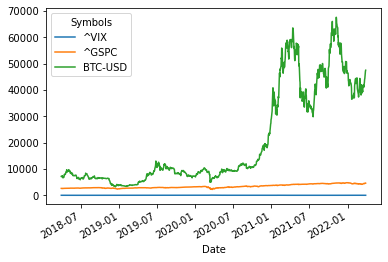

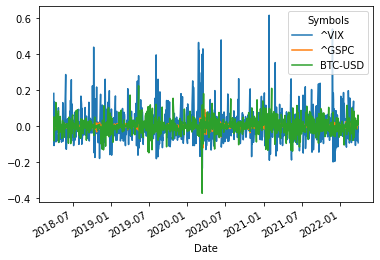

In [85]:
# Converting prices to percentage change to prove correlation

test_df.plot()
test_change = test_df.pct_change().dropna()
test_change.head()
test_change.plot()

In [87]:
# Summary statistics on dataset. IQR's will be used to assign emoticons

test_df.describe(include='all')

Symbols,^VIX,^GSPC,BTC-USD
count,1008.000000,1008.000000,1008.000000
mean,20.738155,3390.874253,20244.129413
std,8.897326,678.989852,18453.845778
min,10.850000,2237.399902,3242.484863
25%,14.985000,2840.320068,7160.808594
50%,18.480000,3123.805054,9690.122070
75%,23.715001,3974.225098,37320.869141
max,82.690002,4796.560059,67566.828125


In [62]:
# Corrlelation of assets

test_change.corr()

Symbols,^VIX,^GSPC,BTC-USD
Symbols,,,
^VIX,1.000000,-0.718006,-0.171619
^GSPC,-0.718006,1.000000,0.228938
BTC-USD,-0.171619,0.228938,1.000000


<AxesSubplot:xlabel='Date'>

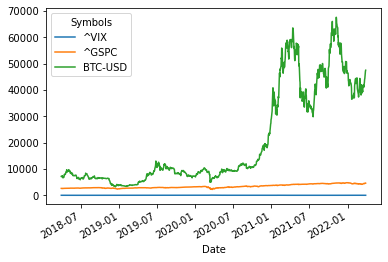

In [89]:
# We will normalize prices from 0 to 1

test_df.plot()

In [64]:
#newest yahoo API 
import yfinance as yahoo_finance
import datetime

In [52]:
# Using yfinance api

ticker = '^VIX'

start_time = datetime.datetime(2014, 3, 29)

#end_time = datetime.datetime(2022, 3, 29)
end_time = datetime.datetime.now().date().isoformat()

In [53]:
def get_data(ticker, start_time, end_time):

    # yahoo gives only daily historical data
    connected = False
    while not connected:
        try:
            ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
            connected = True
            print('connected to yahoo')
        except Exception as e:
            print("type error: " + str(e))
            time.sleep( 5 )
            pass   

    # use numerical integer index instead of date    
    ticker_df = ticker_df.reset_index()
    print(ticker_df.head(5))
    return ticker_df

In [54]:
df = get_data(ticker, start_time, end_time)

connected to yahoo
        Date   High    Low   Open  Close  Volume  Adj Close
0 2014-03-31  14.16  13.57  13.88  13.88       0      13.88
1 2014-04-01  13.56  13.06  13.43  13.10       0      13.10
2 2014-04-02  13.35  12.92  13.17  13.09       0      13.09
3 2014-04-03  13.70  13.02  13.02  13.37       0      13.37
4 2014-04-04  14.55  12.60  12.88  13.96       0      13.96


In [55]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [56]:
df['norm'] = normalize_data(df['Adj Close'])
print(df.tail())

           Date       High        Low       Open      Close  Volume  \
2012 2022-03-25  22.860001  20.799999  21.870001  20.809999       0   
2013 2022-03-28  23.330000  20.790001  22.139999  20.799999       0   
2014 2022-03-29  19.730000  18.670000  19.700001  18.900000       0   
2015 2022-03-30  20.510000  18.719999  19.379999  19.330000       0   
2016 2022-03-30  20.510000  18.719999  19.379999  19.330000       0   

      Adj Close      norm  
2012  20.809999  0.158668  
2013  20.799999  0.158532  
2014  18.900000  0.132699  
2015  19.330000  0.138545  
2016  19.330000  0.138545  


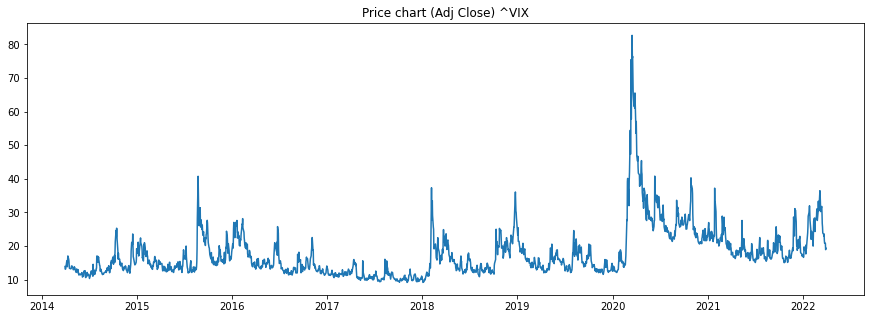

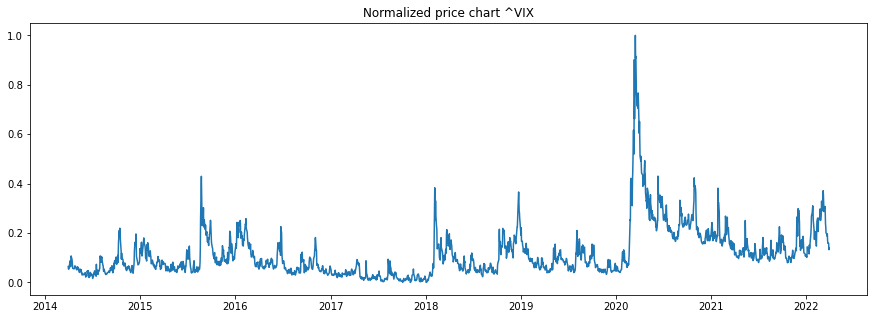

In [57]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + ticker)
plt.show()

# plot normalized price chart
plt.figure(figsize=(15,5))
plt.title('Normalized price chart ' + ticker)
plt.plot(df['Date'], df['norm'])

plt.show()

In [58]:
ticker1='^GSPC'
df1 = get_data(ticker1, start_time, end_time)
df1['norm'] = normalize_data(df1['Adj Close'])


connected to yahoo
        Date         High          Low         Open        Close      Volume  \
0 2014-03-31  1875.180054  1859.160034  1859.160034  1872.339966  3274300000   
1 2014-04-01  1885.839966  1873.959961  1873.959961  1885.520020  3336190000   
2 2014-04-02  1893.170044  1883.790039  1886.609985  1890.900024  3131660000   
3 2014-04-03  1893.800049  1882.650024  1891.430054  1888.770020  3055600000   
4 2014-04-04  1897.280029  1863.260010  1890.250000  1865.089966  3583750000   

     Adj Close  
0  1872.339966  
1  1885.520020  
2  1890.900024  
3  1888.770020  
4  1865.089966  


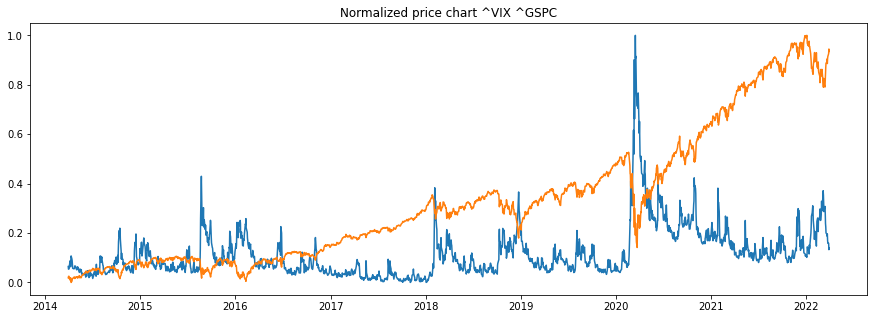

In [59]:
# plot normalized price chart
plt.figure(figsize=(15,5))
plt.title('Normalized price chart ' + ticker + ' ' + ticker1)
plt.plot(df['Date'], df['norm'])
plt.plot(df1['Date'], df1['norm'])

plt.show()